In [1]:
import math
import numpy as np
from ROOT import gROOT, gDirectory, gPad, gSystem, gStyle
from ROOT import TCanvas, TFile, TProfile, TNtuple, TF1, TH1F, TH2F, THStack, TLegend, TGraphErrors, TMultiGraph, TText, TLatex
from ROOT import TGaxis, TCut
from ROOT import kWhite, kBlack, kGray, kRed, kGreen, kBlue, kYellow, kMagenta, kCyan, kOrange, kSpring, kTeal, kAzure, kViolet, kPink
# %jsroot on

Welcome to JupyROOT 6.20/04


In [2]:
gStyle.SetOptFit(0)
gStyle.SetOptStat(0)  
gStyle.SetOptTitle(1)
gStyle.SetTitleBorderSize(0)
gStyle.SetTitleStyle(0)
gStyle.SetMarkerSize(1)
gStyle.SetTitleX(0.2) 
gStyle.SetTitleY(0.9)
gStyle.SetPadLeftMargin(0.2)

In [3]:
# file1 = TFile.Open("/home/ilc/yokugawa/macros/QQbar250/analysis/ssbar/dEdx_dist/rootfiles/DQ_250GeV_ss.minp10.distcut.polar.root")
# file1 = TFile.Open("/home/ilc/yokugawa/macros/QQbar250/analysis/ssbar/dEdx_dist/rootfiles/DQ_250GeV_ss.minp10.distcut.polar.true.root")
# file1 = TFile.Open("/home/ilc/yokugawa/macros/QQbar250/analysis/ssbar/dEdx_dist/rootfiles/double_tag/DQ_250GeV_ss.minp20maxp60.hit210.offset.dEdxMin.root")

# file1 = TFile.Open("/home/ilc/yokugawa/macros/QQbar250/analysis/ssbar/dEdx_dist/rootfiles/double_tag/DQ_250GeV_ss.minp20maxp60.hit210.offset.dEdxMin.mergeFULL.root")
file1 = TFile.Open("/home/ilc/yokugawa/macros/QQbar250/analysis/ssbar/dEdx_dist/rootfiles/double_tag/DQ_250GeV_ss.minp20maxp60.hit210.offset.dEdxMin.neutral.mergeFULL.root")

# file1 = TFile.Open("/home/ilc/yokugawa/macros/QQbar250/analysis/ssbar/dEdx_dist/rootfiles/double_tag/DQ_250GeV_ss.minp20maxp60.hit210.offset0.25.dEdxMin.root")

# file1 = TFile.Open("/home/ilc/yokugawa/macros/QQbar250/analysis/ssbar/dEdx_dist/rootfiles/double_tag/DQ_250GeV_ss.minp10maxp60.hit210.offset.dEdxMin.cheat.root")



In [4]:
def makePretty(p, color):
    p.SetStats(0)
    p.SetMarkerColor(color)
    p.SetLineColor(color)
    p.SetFillColor(color)
    p.SetFillStyle(3003)
    p.SetMarkerStyle(1)
    p.SetMarkerSize(0.2)
    p.SetTitle("")

def GetKeyNames( self, dir = "" ):
        self.cd(dir)
        return [key.GetName() for key in gDirectory.GetListOfKeys()]
    
def Normal(h1):
    h1.Scale(1.0/h1.GetEntries())
    
def Normal2(h1):
    h1.Scale(1.0/h1.Integral(12,88))

In [5]:
TFile.GetKeyNames = GetKeyNames
keyList = file1.GetKeyNames()
print(keyList)

['h_cnt_nevents', 'h_mc_stable_nKaons_evt', 'h_mc_quark_cos', 'h_pfo_pv_kaon', 'h_pfo_pv_pion', 'h_pfo_pv_proton', 'h_pfo_neu_E', 'h_pfo_neu_p', 'h_pfo_neu_E_wrong', 'h_pfo_neu_p_wrong', 'h_pfo_neu_E_correct', 'h_pfo_neu_p_correct', 'h_pfo_kdEdx_dist_kaon', 'h_pfo_kdEdx_dist_proton', 'h_pfo_kdEdx_dist_pion', 'h_pfo_kdEdx_dist_electron', 'h_pfo_kdEdx_dist_muon', 'h_pfo_kdEdx_dist_others', 'h_pfo_pidEdx_dist_kaon', 'h_pfo_pidEdx_dist_proton', 'h_pfo_pidEdx_dist_pion', 'h_pfo_pidEdx_dist_electron', 'h_pfo_pidEdx_dist_muon', 'h_pfo_pidEdx_dist_others', 'h_pfo_pdEdx_dist_kaon', 'h_pfo_pdEdx_dist_proton', 'h_pfo_pdEdx_dist_pion', 'h_pfo_pdEdx_dist_electron', 'h_pfo_pdEdx_dist_muon', 'h_pfo_pdEdx_dist_others', 'h_pfo_LeadKaons_cos', 'h_pfo_LeadKaons_cos_kaon', 'h_pfo_LeadKaons_cos_proton', 'h_pfo_LeadKaons_cos_pion', 'h_pfo_LeadKaons_cos_electron', 'h_pfo_LeadKaons_cos_muon', 'h_pfo_LeadKaons_cos_others', 'h_pfo_QQ_cos_wrong', 'h_pfo_LeadKaons_cos_wrong', 'h_pfo_LeadKaons_cos_sep_wrong', 'h_p

## Momentum Difference

In [6]:
h_pfo_LeadKaons_pdiff_wrong = file1.Get("h_pfo_LeadKaons_pdiff_wrong")
h_pfo_LeadKaons_pdiff_correct = file1.Get("h_pfo_LeadKaons_pdiff_correct")

makePretty(h_pfo_LeadKaons_pdiff_correct,kBlack)
makePretty(h_pfo_LeadKaons_pdiff_wrong,kBlue)

In [7]:
Normal(h_pfo_LeadKaons_pdiff_correct)
Normal(h_pfo_LeadKaons_pdiff_wrong)

In [8]:
c1 = TCanvas("c1","c1",500,500)

In [9]:
# h_pfo_LeadKaons_pdiff_correct.GetXaxis().SetTitle("cos#theta_{s,K^{-}}");
h_pfo_LeadKaons_pdiff_wrong.GetYaxis().SetRangeUser(0,0.11)

h_pfo_LeadKaons_pdiff_wrong.Draw("h")
h_pfo_LeadKaons_pdiff_correct.Draw("hsame")

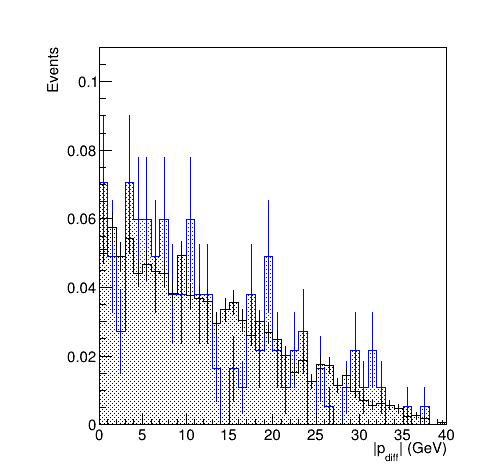

In [10]:
c1.Draw()

## LeadK dEdx Wrong

In [11]:
h_pfo_LeadK_p_dEdx_wrong = file1.Get("h_pfo_LeadK_p_dEdx_wrong")
h_pfo_p_dEdx_kaon = file1.Get("h_pfo_p_dEdx_kaon")
h_pfo_p_dEdx_pion = file1.Get("h_pfo_p_dEdx_pion")
h_pfo_p_dEdx_proton = file1.Get("h_pfo_p_dEdx_proton")

h_pfo_p_dEdx_kaon.SetMarkerColor(kRed)
h_pfo_p_dEdx_pion.SetMarkerColor(kBlue)
h_pfo_p_dEdx_proton.SetMarkerColor(kGreen+2)

h_pfo_p_dEdx_pion.SetMarkerStyle(8)
h_pfo_p_dEdx_pion.SetMarkerSize(0.3)

h_pfo_p_dEdx_proton.SetMarkerStyle(8)
h_pfo_p_dEdx_proton.SetMarkerSize(0.3)

h_pfo_LeadK_p_dEdx_wrong.SetMarkerStyle(8)
h_pfo_LeadK_p_dEdx_wrong.SetMarkerSize(0.5)

In [12]:
c2 = TCanvas("c2","c2",500,500)

h_pfo_p_dEdx_kaon.SetTitle(";p (GeV);dE/dx")

h_pfo_p_dEdx_kaon.GetYaxis().SetRangeUser(0.14,0.19)
h_pfo_p_dEdx_kaon.GetXaxis().SetRangeUser(20,60)

h_pfo_p_dEdx_kaon.Draw("p")
h_pfo_p_dEdx_pion.Draw("psame")
h_pfo_p_dEdx_proton.Draw("psame")
h_pfo_LeadK_p_dEdx_wrong.Draw("psame")

In [13]:
leg = TLegend(0.65,0.4,0.9,0.2,"","brNDC")
leg.SetFillColor(kWhite)
leg.SetBorderSize(0)
leg.SetTextSize(0.035)
leg.AddEntry(h_pfo_p_dEdx_kaon,"Kaon","p")
leg.AddEntry(h_pfo_p_dEdx_pion,"Pion","p")
leg.AddEntry(h_pfo_p_dEdx_proton,"Proton","p")
leg.AddEntry(h_pfo_LeadK_p_dEdx_wrong,"Wrong","p")
leg.Draw()

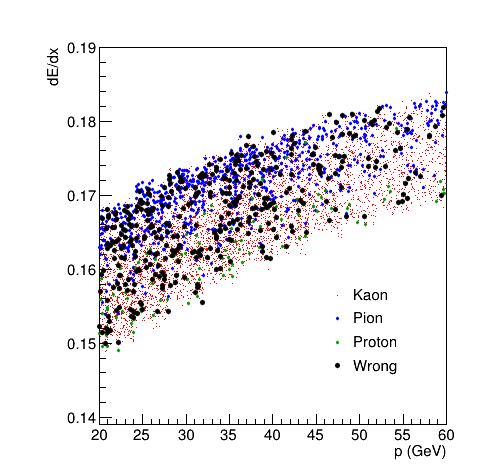

In [14]:
c2.Draw()

## LPFO momenta

In [15]:
h_pfo_LeadK_p_wrong   = file1.Get("h_pfo_LeadK_p_wrong")
h_pfo_LeadK_p_correct = file1.Get("h_pfo_LeadK_p_correct")

In [16]:
c6 = TCanvas("c6","c6",500,500)

In [17]:
h_pfo_LeadK_p_wrong.SetTitle(";p LPFO0 (GeV);p LPFO1 (GeV)")
h_pfo_LeadK_p_wrong.GetXaxis().SetRangeUser(20,60)
h_pfo_LeadK_p_wrong.GetYaxis().SetRangeUser(20,60)

h_pfo_LeadK_p_wrong.Draw("colz")

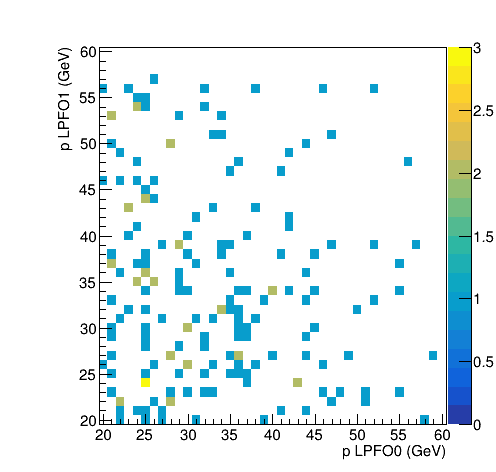

In [18]:
c6.Draw()

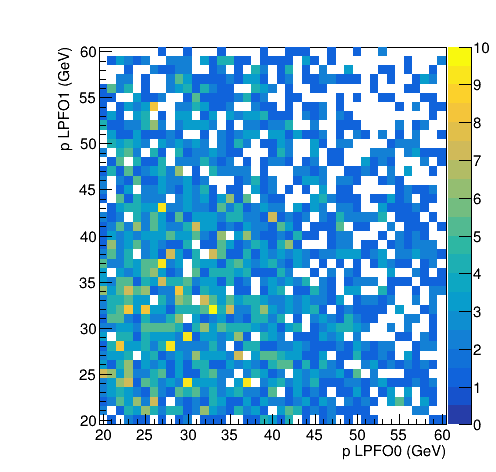

In [19]:
c7 = TCanvas("c7","c7",500,500)
h_pfo_LeadK_p_correct.SetTitle(";p LPFO0 (GeV);p LPFO1 (GeV)")
h_pfo_LeadK_p_correct.GetXaxis().SetRangeUser(20,60)
h_pfo_LeadK_p_correct.GetYaxis().SetRangeUser(20,60)
h_pfo_LeadK_p_correct.Draw("colz")
c7.Draw()

## MC nKaon Stable

In [20]:
h_mc_stable_nKaons_evt   = file1.Get("h_mc_stable_nKaons_evt")
makePretty(h_mc_stable_nKaons_evt,kBlack)

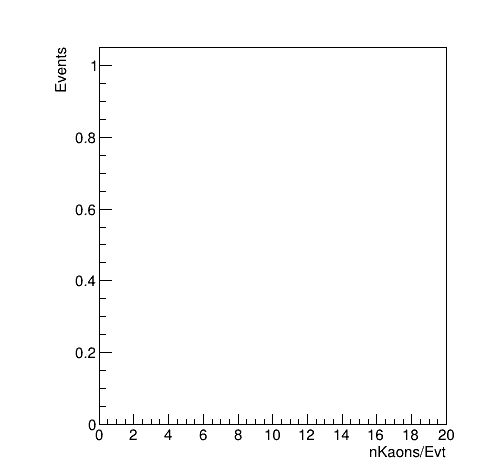

In [21]:
c8 = TCanvas("c8","c8",500,500)
# h_pfo_LeadK_p_correct.SetTitle(";p LPFO0 (GeV);p LPFO1 (GeV)")
# h_pfo_LeadK_p_correct.GetXaxis().SetRangeUser(20,60)
# h_pfo_LeadK_p_correct.GetYaxis().SetRangeUser(20,60)
h_mc_stable_nKaons_evt.Draw("h")
c8.Draw()

## Offset Wrong

In [22]:
h_pfo_LeadKaons_ip_wrong   = file1.Get("h_pfo_LeadKaons_ip_wrong")
h_pfo_LeadKaons_ip_correct = file1.Get("h_pfo_LeadKaons_ip_correct")

makePretty(h_pfo_LeadKaons_ip_correct,kBlack)
makePretty(h_pfo_LeadKaons_ip_wrong,kBlue)

In [23]:
Normal(h_pfo_LeadKaons_ip_correct)
Normal(h_pfo_LeadKaons_ip_wrong)

In [24]:
c3 = TCanvas("c3","c3",500,500)

In [25]:
h_pfo_LeadKaons_ip_wrong.GetYaxis().SetRangeUser(0,0.07)

h_pfo_LeadKaons_ip_wrong.Draw("h")
h_pfo_LeadKaons_ip_correct.Draw("hsame")

In [26]:
leg = TLegend(0.65,0.85,0.9,0.6,"","brNDC")
leg.SetFillColor(kWhite)
leg.SetBorderSize(0)
leg.SetTextSize(0.035)
leg.AddEntry(h_pfo_LeadKaons_ip_wrong,"Wrong","fp")
leg.AddEntry(h_pfo_LeadKaons_ip_correct,"Correct","fp")
leg.Draw()

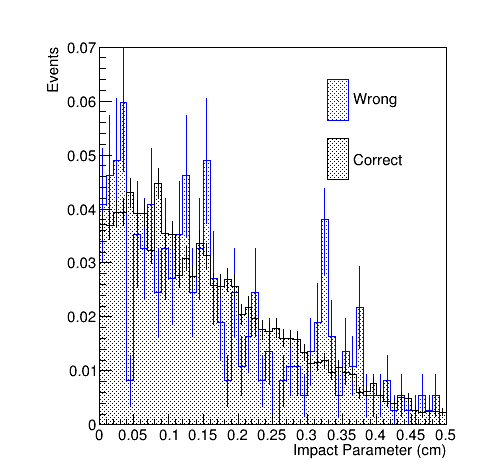

In [27]:
c3.Draw()

## Kaon Mult

In [28]:
h_pfo_nSignK_wrong0 = file1.Get("h_pfo_nSignK_wrong0")
h_pfo_nSignK_wrong1 = file1.Get("h_pfo_nSignK_wrong1")

h_pfo_nSignKopp_wrong0 = file1.Get("h_pfo_nSignKopp_wrong0")
h_pfo_nSignKopp_wrong1 = file1.Get("h_pfo_nSignKopp_wrong1")

h_pfo_reco_nSignKopp_wrong0 = file1.Get("h_pfo_reco_nSignKopp_wrong0")
h_pfo_reco_nSignKopp_wrong1 = file1.Get("h_pfo_reco_nSignKopp_wrong1")

h_pfo_SignKopp_p_wrong = file1.Get("h_pfo_SignKopp_p_wrong")
h_pfo_reco_SignKopp_p_wrong = file1.Get("h_pfo_reco_SignKopp_p_wrong")

h_pfo_nSignK_correct0 = file1.Get("h_pfo_nSignK_correct0")
h_pfo_nSignK_correct1 = file1.Get("h_pfo_nSignK_correct1")

h_pfo_nSignKopp_correct0 = file1.Get("h_pfo_nSignKopp_correct0")
h_pfo_nSignKopp_correct1 = file1.Get("h_pfo_nSignKopp_correct1")

h_pfo_reco_nSignKopp_correct0 = file1.Get("h_pfo_reco_nSignKopp_correct0")
h_pfo_reco_nSignKopp_correct1 = file1.Get("h_pfo_reco_nSignKopp_correct1")

h_pfo_SignKopp_p_correct = file1.Get("h_pfo_SignKopp_p_correct")
h_pfo_reco_SignKopp_p_correct = file1.Get("h_pfo_reco_SignKopp_p_correct")

makePretty(h_pfo_nSignK_wrong0,kBlack)
makePretty(h_pfo_nSignK_wrong1,kBlue)

makePretty(h_pfo_nSignKopp_wrong0,kBlack)
makePretty(h_pfo_nSignKopp_wrong1,kBlue)

makePretty(h_pfo_reco_nSignKopp_wrong0,kBlack)
makePretty(h_pfo_reco_nSignKopp_wrong1,kBlue)

makePretty(h_pfo_SignKopp_p_wrong,kBlue)
makePretty(h_pfo_reco_SignKopp_p_wrong,kBlue)

makePretty(h_pfo_nSignK_correct0,kBlack)
makePretty(h_pfo_nSignK_correct1,kBlue)

makePretty(h_pfo_nSignKopp_correct0,kBlack)
makePretty(h_pfo_nSignKopp_correct1,kBlue)

makePretty(h_pfo_reco_nSignKopp_correct0,kBlack)
makePretty(h_pfo_reco_nSignKopp_correct1,kBlue)

makePretty(h_pfo_SignKopp_p_correct,kBlack)
makePretty(h_pfo_reco_SignKopp_p_correct,kBlack)


### Wrong

In [29]:
c4 = TCanvas("c4","c4",500,500)

In [30]:
h_pfo_nSignK_wrong1.Draw("h")
h_pfo_nSignK_wrong0.Draw("hsame")

In [31]:
leg = TLegend(0.55,0.85,0.8,0.7,"","brNDC")
leg.SetFillColor(kWhite)
leg.SetBorderSize(0)
leg.SetTextSize(0.035)
leg.AddEntry(h_pfo_nSignK_wrong0,"Wrong LPFO0","fp")
leg.AddEntry(h_pfo_nSignK_wrong1,"Wrong LPFO1","fp")
leg.Draw()

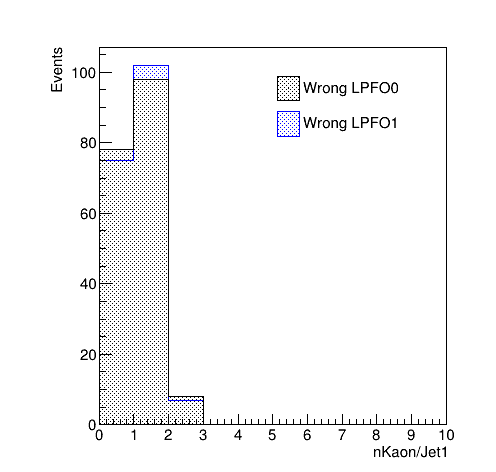

In [32]:
c4.Draw()

### Wrong (Opposite chg)

In [33]:
c9 = TCanvas("c9","c9",500,500)

In [34]:
h_pfo_nSignKopp_wrong1.Draw("h")
h_pfo_nSignKopp_wrong0.Draw("hsame")

In [35]:
leg = TLegend(0.55,0.85,0.8,0.7,"","brNDC")
leg.SetFillColor(kWhite)
leg.SetBorderSize(0)
leg.SetTextSize(0.035)
leg.AddEntry(h_pfo_nSignKopp_wrong0,"Wrong LPFO0","fp")
leg.AddEntry(h_pfo_nSignKopp_wrong1,"Wrong LPFO1","fp")
leg.Draw()

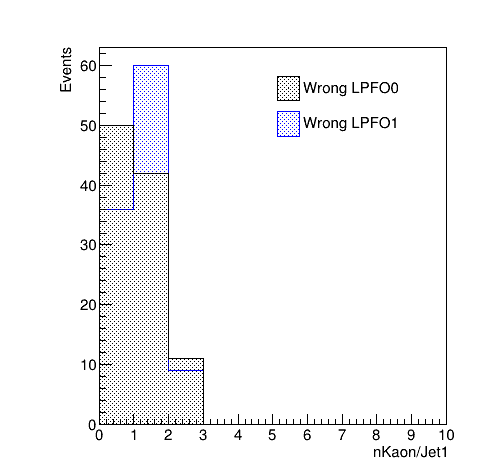

In [36]:
c9.Draw()

### Wrong (Opposite chg)

In [37]:
c90 = TCanvas("c90","c90",500,500)

In [38]:
h_pfo_reco_nSignKopp_wrong0.Draw("h")
h_pfo_reco_nSignKopp_wrong1.Draw("hsame")

In [39]:
leg = TLegend(0.55,0.85,0.8,0.7,"","brNDC")
leg.SetFillColor(kWhite)
leg.SetBorderSize(0)
leg.SetTextSize(0.035)
leg.AddEntry(h_pfo_reco_nSignKopp_wrong0,"Wrong LPFO0","fp")
leg.AddEntry(h_pfo_reco_nSignKopp_wrong1,"Wrong LPFO1","fp")
leg.Draw()

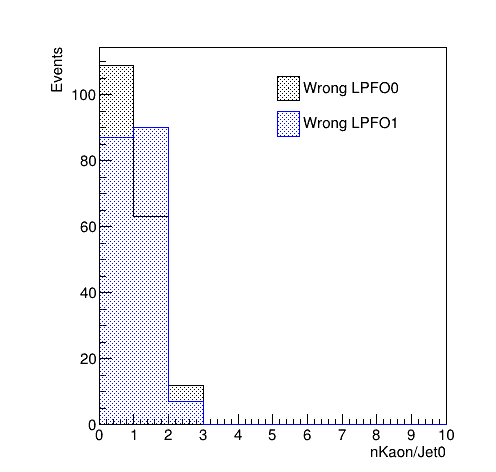

In [40]:
c90.Draw()

### Wrong SPFO momentum (LPFO inclusive)

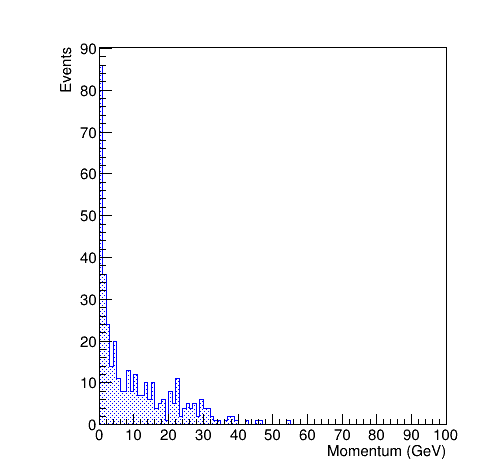

In [41]:
c10 = TCanvas("c10","c10",500,500)
h_pfo_SignKopp_p_wrong.Draw("h")
c10.Draw()

### Correct

In [42]:
c5 = TCanvas("c5","c5",500,500)

In [43]:
h_pfo_nSignK_correct1.Draw("h")
h_pfo_nSignK_correct0.Draw("hsame")

In [44]:
leg = TLegend(0.55,0.85,0.8,0.7,"","brNDC")
leg.SetFillColor(kWhite)
leg.SetBorderSize(0)
leg.SetTextSize(0.035)
leg.AddEntry(h_pfo_nSignK_correct0,"Correct LPFO0","fp")
leg.AddEntry(h_pfo_nSignK_correct1,"Correct LPFO1","fp")
leg.Draw()

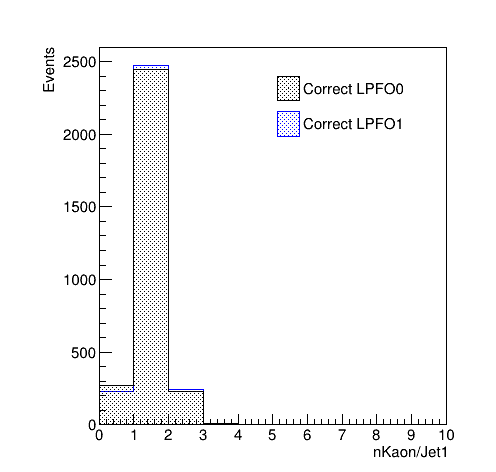

In [45]:
c5.Draw()

### Correct (Opposite chg)

In [46]:
c11 = TCanvas("c11","c11",500,500)

In [47]:
h_pfo_nSignKopp_correct1.Draw("h")
h_pfo_nSignKopp_correct0.Draw("hsame")

In [48]:
leg = TLegend(0.55,0.85,0.8,0.7,"","brNDC")
leg.SetFillColor(kWhite)
leg.SetBorderSize(0)
leg.SetTextSize(0.035)
leg.AddEntry(h_pfo_nSignKopp_correct0,"Correct LPFO0","fp")
leg.AddEntry(h_pfo_nSignKopp_correct1,"Correct LPFO1","fp")
leg.Draw()

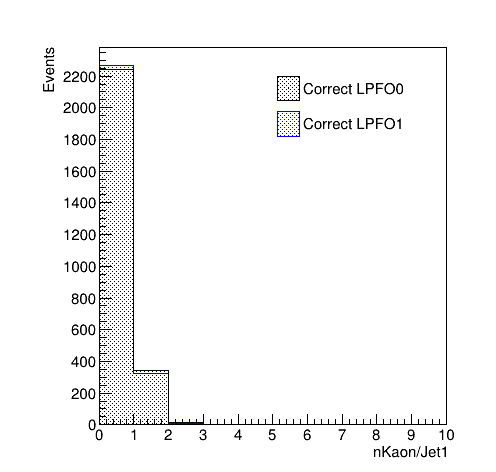

In [49]:
c11.Draw()

In [50]:
c110 = TCanvas("c110","c110",500,500)

In [51]:
h_pfo_reco_nSignKopp_correct1.Draw("h")
h_pfo_reco_nSignKopp_correct0.Draw("hsame")

In [52]:
leg = TLegend(0.55,0.85,0.8,0.7,"","brNDC")
leg.SetFillColor(kWhite)
leg.SetBorderSize(0)
leg.SetTextSize(0.035)
leg.AddEntry(h_pfo_reco_nSignKopp_correct0,"Correct LPFO0","fp")
leg.AddEntry(h_pfo_reco_nSignKopp_correct1,"Correct LPFO1","fp")
leg.Draw()

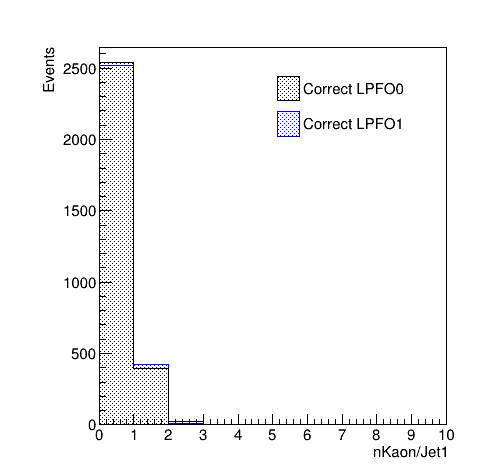

In [53]:
c110.Draw()

### Correct SPFO momentum (LPFO inclusive)

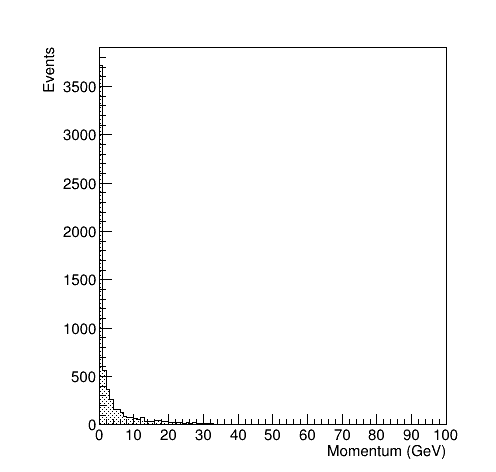

In [54]:
c12 = TCanvas("c12","c12",500,500)
h_pfo_SignKopp_p_correct.Draw("h")
c12.Draw()

### SignKopp_p opposite chg correct & wrong

In [55]:
c13 = TCanvas("c13","c13",500,500)

In [56]:
Normal(h_pfo_SignKopp_p_correct)
Normal(h_pfo_SignKopp_p_wrong)

In [57]:
h_pfo_SignKopp_p_correct.GetXaxis().SetRangeUser(0,60)
c13.SetLogy()

h_pfo_SignKopp_p_correct.Draw("h")
h_pfo_SignKopp_p_wrong.Draw("hsame")

In [58]:
leg = TLegend(0.55,0.85,0.8,0.7,"","brNDC")
leg.SetFillColor(kWhite)
leg.SetBorderSize(0)
leg.SetTextSize(0.035)
leg.AddEntry(h_pfo_SignKopp_p_correct,"Correct","fp")
leg.AddEntry(h_pfo_SignKopp_p_wrong,"Wrong","fp")
leg.Draw()

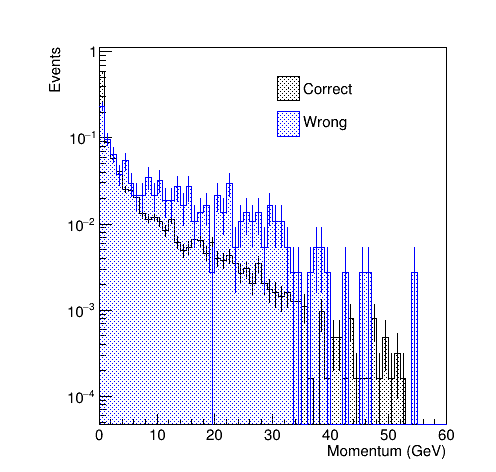

In [59]:
c13.Draw()

### Reco SignKopp_p opposite chg correct & wrong

In [60]:
c14 = TCanvas("c14","c14",500,500)

In [61]:
Normal(h_pfo_reco_SignKopp_p_correct)
Normal(h_pfo_reco_SignKopp_p_wrong)

In [62]:
h_pfo_reco_SignKopp_p_correct.GetXaxis().SetRangeUser(0,60)
c14.SetLogy()

h_pfo_reco_SignKopp_p_correct.Draw("h")
h_pfo_reco_SignKopp_p_wrong.Draw("hsame")

In [63]:
leg = TLegend(0.55,0.85,0.8,0.7,"","brNDC")
leg.SetFillColor(kWhite)
leg.SetBorderSize(0)
leg.SetTextSize(0.035)
leg.AddEntry(h_pfo_reco_SignKopp_p_correct,"Correct","fp")
leg.AddEntry(h_pfo_reco_SignKopp_p_wrong,"Wrong","fp")
leg.Draw()

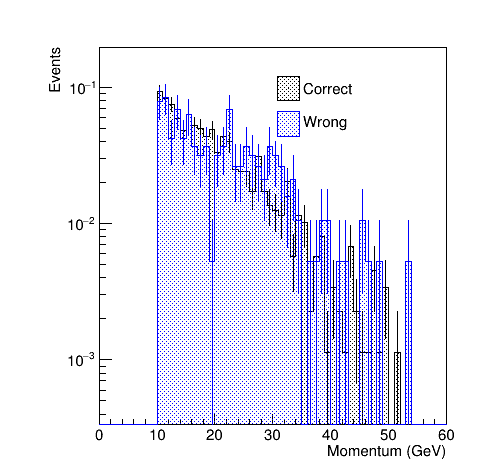

In [64]:
c14.Draw()

## Appendix

### Legend
```python
leg = TLegend(0.65,0.85,0.9,0.65,"","brNDC")
leg.SetFillColor(kWhite)
leg.SetBorderSize(0)
leg.SetTextSize(0.035)
leg.AddEntry(h_pfo_nKaons_evt,"All","fp")
leg.AddEntry(h_pfo_nKaons_evt_uu,"u#bar{u}","fp")
leg.AddEntry(h_pfo_nKaons_evt_ss,"s#bar{s}","fp")
leg.Draw()
```